# Simplex Method

Given a matrix, we perform row operations until the z-row is non-negative or a condition for the aglorithm cannot be satisfied.

Input: An m x n matrix

Output: A matrix with the z-row non-negative or None if the algorithm fails

Test out the code here!  
https://repl.it/@JeaneC/StaidCyberEngine

### Simplex Algorithm

1. Check the 0th Row (The Z-Row) for negative numbers.   
    a. If there are no negative values then return the soln_matrix
    
2. Choose the most negative value in the z-column. If there's a tie, choose the first one from left to right. Call this column pivot_column

3. Check each row of the pivot_column. Take the ratio of the value at that (row, column) / RHS. RHS is the the value in the last column of that row.

4. Check the ratios  
    a. If all the ratios are negative, then return None  
    b. Else, record the row index with the smallest non-negative ratio as pivot_row

5. Perform row operations to clear pivot_column with pivot_row.

6. Repeat 1 - 5
    


From HW 1, Problem 1 

Our starting matrix is: 
[[  1 -80 -70   0   0   0   0]
 [  0   2   1   1   0   0  32]
 [  0   1   1   0   1   0  18]
 [  0   1   3   0   0   1  36]]
This is iteration 0
[[  1 -80 -70   0   0   0   0]
 [  0   2   1   1   0   0  32]
 [  0   1   1   0   1   0  18]
 [  0   1   3   0   0   1  36]]
This is iteration 1
[[   2    0  -60   80    0    0 2560]
 [   0    2    1    1    0    0   32]
 [   0    0    1   -1    2    0    4]
 [   0    0    5   -1    0    2   40]]

The soln matrix:
[[   2    0    0   20  120    0 2800]
 [   0    2    0    2   -2    0   28]
 [   0    0    1   -1    2    0    4]
 [   0    0    0    4  -10    2   20]]
Basic Vars are: 
Z = 1400.0
x1 = 14.0 
x2 = 4.0 
x5 = 10.0 



From HW 2, Problem 2

Our starting matrix is: 
[[  1 -50 -80   0   0   0]
 [  0   1   2   1   0  32]
 [  0   3   4   0   1  84]]
This is iteration 0
[[  1 -50 -80   0   0   0]
 [  0   1   2   1   0  32]
 [  0   3   4   0   1  84]]
This is iteration 1
[[   2  -20    0   80   

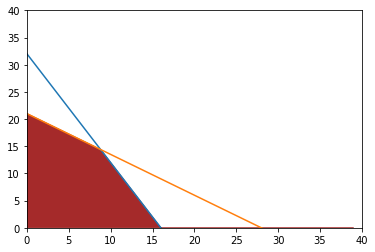

In [1]:
import numpy as np 

def maximizeSimplexMethod(matrix):
    z_row, rhs_col = 0, len(matrix[0]) - 1
    counter = 0
    
    while hasNegativeValuesInZRow(matrix[z_row]):
        logMatrixData(matrix, counter)
        
        # Get the column index with the smallest value. If there's a tie, argmin chooses the first one.
        pivot_column_index = matrix[z_row].argmin() 
        
        # Get the row with the smallest positive RHS/val ratio. This returns None if we have all negative ratios
        pivot_row_index = getRowWithSmallestRatio(matrix, pivot_column_index, rhs_col)
        
        # Stop the algorithm if we have all negative ratios.
        if pivot_row_index is None: 
            return None
        else:
            clearColumn(matrix, pivot_column_index, pivot_row_index)
        
        
        counter += 1
    
    return matrix
    
def hasNegativeValuesInZRow(row):
    return np.any(row < 0)

def getRowWithSmallestRatio(matrix, pivot_column_index, rhs_col):
    smallest_ratio = float('inf') # The first positive value will immediately replace this since anything is < inf.
    smallest_i = None
    
    for row_i, row in enumerate(matrix):
        if row_i == 0: # Ignore the z-row
            continue
        
        ratio = row[rhs_col] / row[pivot_column_index]
        
        if ratio >= 0 and ratio < smallest_ratio:
            smallest_ratio = ratio
            smallest_i = row_i
    
    return smallest_i

def clearColumn(matrix, pivot_column_index, pivot_row_index):
    for row_i in range(len(matrix)):
        if row_i == pivot_row_index:
            # Skip the pivot row
            continue
        else:
            # If row is [1, -1, 2, 3], pivot_row is [0, 3, 4, 5], and the pivot is the 2nd column (value with 3). 
            # To clear -1, we'll do (-1) * (3) - (3) * (-1).
            
            pivot_val = matrix[pivot_row_index][pivot_column_index] # 3 in example above
            row_val = matrix[row_i][pivot_column_index] # -1 in example above
            
            matrix[row_i] = pivot_val * matrix[row_i] - row_val * matrix[pivot_row_index]
            

    
#### Ignore these functions... 
        
def runSimplexMethod(matrix):
    print('Our starting matrix is: ')
    print(matrix)
    
    soln_matrix = maximizeSimplexMethod(matrix)
    
    if soln_matrix is None:
        print('The simplex algorithm failed')
    else:
        print('\nThe soln matrix:')
        print(soln_matrix)
        
        # Get Basic Values
        basic_vars = []
        
        # Check each column to see if it is holding a basic variable
        for column_index in range(len(soln_matrix[0])):
            
            # We need exactly 1 row in a column to have a nonzero value.
            nonzero_row_count = 0
            nonzero_row = 0
            
            for row_index in range(len(soln_matrix)):
                if soln_matrix[row_index][column_index] != 0:
                    nonzero_row_count += 1
                    nonzero_row = row_index
                
                # Move onto next column
                if nonzero_row_count >= 2:
                    break
     
            
            if nonzero_row_count == 1:
                row = soln_matrix[nonzero_row]
                basic_vars.append((column_index, row[-1]/ row[column_index] ))
        
        print('Basic Vars are: ')
        for basic_var, val in basic_vars:
            if (basic_var == 0):
                print('Z = {}'.format(val))
            else:
                print('x{} = {} '.format(basic_var, val))

def logMatrixData(matrix, counter):
        print('This is iteration {}'.format(counter))
        print(matrix)

##### 
##### Test the code. 


print('From HW 1, Problem 1 \n')
# Create a 2-D Matrix like this 
matrix1 = np.array([
    [1, -80, -70, 0, 0, 0, 0],
    [0, 2, 1, 1, 0, 0, 32],
    [0, 1, 1, 0, 1, 0, 18],
    [0, 1, 3, 0, 0, 1, 36]
])

# call runSimplexMethod(matrixName)
runSimplexMethod(matrix1)


print('\n\n\nFrom HW 2, Problem 2\n')
matrix1 = np.array([
    [1, -50, -80, 0, 0, 0],
    [0, 1, 2, 1, 0, 32],
    [0, 3, 4, 0, 1, 84],
])
runSimplexMethod(matrix1)



### Extra Stuff - Graphing!
import matplotlib.pyplot as plt
%matplotlib inline

print('Graphing  HW 2, Problem 2')
x = np.arange(0, 40)
y1 = 32 - 2*x
y2 = (-3/4) * x + 84/4
y = np.minimum(y1,y2)
plt.ylim(0, 40)
plt.xlim(0, 40)
plt.plot(x, y1, label = 'x1 + 2x2 <= 32')
plt.plot(x, y2, label = '3x1 + 4x2 <= 84')
plt.fill_between(x, y, color='brown')

## Graphs

Shortest Path Algorithm

1. Start w/ two sets connected and unconnected sets. Put the source node in the connectedSet.
2. Record the distance of adjacent neighbors of the source node
3. From the set of connected nodes, find nodes immediately adjacent to them that are still unconnected  
4. Choose the node with the least distance from the source and add it to the connected set.  
5. With the same node, call it newConnectedNode, check each neighbor and record new minimum distances.  
    a. A new distance exists to this neighbor. It is the distance from the source to newConnectedNode + newConnectedNode distance to neighbor. Call it newDistance.  
    b. If a neighbor never had any recorded distances from the source, then its distance is newDistance  
    c. If it previously had a recorded distance, then only update the data if newDistance < previousMinDistance
6. Repeat steps 3-5 until all nodes are in the connected set.



In [2]:
import numpy as np

class GraphNode:
    
    # Will represent neighbors as a list of pairs of (toNode, weightToNode). [(b, 5), (c,4)]
    def __init__(self, value):
        self.value = value
        self.edges = []
    
    def addEdges(self, edges):
        self.edges.extend(edges)

def shortestPath(unconnectedNodes):
    # Prepare the Algorithm with the source node and its neighbors
    sourceNode = unconnectedNodes.pop(0) 
    connectedNodes = [sourceNode]
    distanceDictionary = {sourceNode: [sourceNode, 0]}
    updateDistances(sourceNode, distanceDictionary)
    iterations = 0
    
    
    while unconnectedNodes:
        print('\nIteration {}'.format(iterations))
        adjacentUnconnectedNeighbors = getNearbyUnconnectedNeighbors(connectedNodes, unconnectedNodes)
        closestDistance = float('inf')
        closestNode = None
        
        for neighbor in adjacentUnconnectedNeighbors:
            distanceFromSource = distanceDictionary[neighbor][1]
            
            if distanceFromSource < closestDistance:
                closestDistance = distanceFromSource
                closestNode = neighbor
        
        logData(connectedNodes, adjacentUnconnectedNeighbors, distanceDictionary, closestNode, closestDistance)
        unconnectedNodes.remove(closestNode)
        connectedNodes.append(closestNode)
        updateDistances(closestNode, distanceDictionary)
        iterations += 1
    
    return distanceDictionary


def getNearbyUnconnectedNeighbors(connectedNodes, unconnectedNodes):
    adjacentUnconnectedNeighbors = []
    
    for node in connectedNodes:
        for neighbor, distance in node.edges:
            if neighbor in unconnectedNodes and neighbor not in adjacentUnconnectedNeighbors:
                adjacentUnconnectedNeighbors.append(neighbor)
    
    return adjacentUnconnectedNeighbors

                
def updateDistances(newConnectedNode, distanceDictionary):
    currentDistance = distanceDictionary[newConnectedNode][1]
    
    for neighbor, distanceFromConnectedNode in newConnectedNode.edges:
        newPossibleMinDistance = currentDistance + distanceFromConnectedNode
        
        if neighbor not in distanceDictionary:
            distanceDictionary[neighbor] = [newConnectedNode, newPossibleMinDistance]
        else: # Node has a recorded previous distance
            previousMinDistance = distanceDictionary[neighbor][1]
            
            if newPossibleMinDistance < previousMinDistance:
                distanceDictionary[neighbor] = [newConnectedNode, newPossibleMinDistance]
    

##### Extra Messy Stuff
def logData(connectedNodes, adjacentUnconnectedNeighbors, distanceDictionary, closestNode, closestDistance):
        
    print('The connected nodes in the set are ', [node.value for node in connectedNodes])
    print('The pool of nearby unconnected neigbors and their distance are', [(neighbor.value, distanceDictionary[neighbor][1]) for neighbor in adjacentUnconnectedNeighbors])
    print('The node closest to the source from this pool is {}'.format(closestNode.value))

def printResults(soln, source):
    nodeMap = {}

    print('---------------------')
    print('Results')
    for node, nodeInfo in soln.items():
        previousNode = nodeInfo[0]
        nodeMap[node] = previousNode 

    for node, nodeInfo in soln.items():
        previousNode = nodeInfo[0]
        pathOfNode = [previousNode]
        
        while pathOfNode[0].value != source:
            pathOfNode.insert(0, nodeMap[pathOfNode[0]])

        pathOfNode.append(node)

        print('\nThe shortest distance from {} to {} is {}'.format(source, node.value, nodeInfo[1]))
        path = ' -> '.join([node.value for node in pathOfNode])
        print('It takes the path: ', path)

From Problem 1 in class
<img src="./1.JPG" style="width: 300px;"/>

From Problem 2 in class
<img src="./two.JPG" style="width: 300px;"/>


In [3]:
### Testing the Data - It gets messy here. Ignore


# From the first example in class
S = GraphNode('Source')
A = GraphNode('A')
B = GraphNode('B')
C = GraphNode('C')
D = GraphNode('D')
E = GraphNode('E')

S.addEdges([(A, 3), (B, 1)])
A.addEdges([(S, 3), (B, 1), (C, 2)])
B.addEdges([(S, 1), (A, 1), (C, 3), (D, 5)])
C.addEdges([(A, 2), (B, 3), (D, 1), (E, 3)])
D.addEdges([(B, 5), (C, 1), (E, 1)])
E.addEdges([(C, 3), (D, 1)])

print('Problem 1 From Class')
printResults(shortestPath([S, A, B, C, D, E]), 'Source')

    
# 2nd Problem
print('\n\n\n\n\n\n\nProblem 2 From Class')

one = GraphNode('Node 1')
two = GraphNode('Node 2')
three = GraphNode('Node 3')
four = GraphNode('Node 4')
five = GraphNode('Node 5')
six = GraphNode('Node 6')

one.addEdges([(six, 14), (two, 7), (three, 9)])
two.addEdges([(three, 10), (four, 15)])
three.addEdges([(six, 2), (four, 11)])
four.addEdges([(five, 6)])
five.addEdges([])
six.addEdges([(five, 9)])
printResults(shortestPath([one, two, three, four, five, six]), 'Node 1')

Problem 1 From Class

Iteration 0
The connected nodes in the set are  ['Source']
The pool of nearby unconnected neigbors and their distance are [('A', 3), ('B', 1)]
The node closest to the source from this pool is B

Iteration 1
The connected nodes in the set are  ['Source', 'B']
The pool of nearby unconnected neigbors and their distance are [('A', 2), ('C', 4), ('D', 6)]
The node closest to the source from this pool is A

Iteration 2
The connected nodes in the set are  ['Source', 'B', 'A']
The pool of nearby unconnected neigbors and their distance are [('C', 4), ('D', 6)]
The node closest to the source from this pool is C

Iteration 3
The connected nodes in the set are  ['Source', 'B', 'A', 'C']
The pool of nearby unconnected neigbors and their distance are [('D', 5), ('E', 7)]
The node closest to the source from this pool is D

Iteration 4
The connected nodes in the set are  ['Source', 'B', 'A', 'C', 'D']
The pool of nearby unconnected neigbors and their distance are [('E', 6)]
The n

# Northwest Corner Method

1. Start at the NW (topmost, leftmost) Cell. Designate it as the current cell.
2. At the current cell, determine the row limit (supply) and column limit (demand).  
    a. If row limit < column limit. Set row limit to 0. column limit = column limit - row limit. Fill cell with value of row limit. Change the designative cell to one row below the current cell.   
    b. If row limit >= column limit. Set col limit to 0. row limit = row limit - col limit. Fill cell with value of col limit. Change the designative cell to one column right of the current cell  

In [4]:
import numpy as np

# Supply = Rows, Demand = Columns
def northWestMethod(sampleMatrix, row_constraints, column_constraints):
    currRow, currCol = 0, 0
    
    # Soln is done when we are outside of the matrix
    rightBorder, bottomBorder = len(column_constraints), len(row_constraints)
    
    while currRow < bottomBorder and currCol < rightBorder:
        print(sampleMatrix)
        
        if row_constraints[currRow] < column_constraints[currCol]:
            sampleMatrix[currRow][currCol] = row_constraints[currRow]
            
            column_constraints[currCol] -= row_constraints[currRow]
            row_constraints[currRow] = 0
            
            currRow += 1
        else:
            sampleMatrix[currRow][currCol] = column_constraints[currCol]
            
            row_constraints[currRow] -= column_constraints[currCol]
            column_constraints[currCol] = 0
            
            currCol += 1
    
    return sampleMatrix
           
sampleMatrix = np.array([
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 0]
])

sampleMatrixCosts = np.array([
    [10, 2, 20, 11],
    [12, 7, 9, 20],
    [4, 14, 16, 18]
])

row_constraints = [15, 25, 10]
column_constraints = [5, 15, 15, 15]

print(northWestMethod(sampleMatrix, row_constraints, column_constraints))


[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
[[5 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
[[ 5 10  0  0]
 [ 0  0  0  0]
 [ 0  0  0  0]]
[[ 5 10  0  0]
 [ 0  5  0  0]
 [ 0  0  0  0]]
[[ 5 10  0  0]
 [ 0  5 15  0]
 [ 0  0  0  0]]
[[ 5 10  0  0]
 [ 0  5 15  5]
 [ 0  0  0  0]]
[[ 5 10  0  0]
 [ 0  5 15  5]
 [ 0  0  0 10]]


# Least Cost Method

In [5]:
import numpy as np

def leastCostMethod(sampleMatrix, sampleMatrixCosts, rowConstraints, columnConstraints):
    
    cheapestCell = searchForCheapestCell(sampleMatrixCosts, rowConstraints, columnConstraints)
    
    # Continue until we can no longer find a valid cell
    counter = 0
    while cheapestCell and counter < 10:
        row, col = cheapestCell
        logData(counter, sampleMatrix, sampleMatrixCosts, cheapestCell)
        
        if rowConstraints[row] < columnConstraints[col]:
            sampleMatrix[row][col] = rowConstraints[row]
            columnConstraints[col] -= rowConstraints[row]
            
            rowConstraints[row] = -1
        else: # column is smaller, so we put as much as the column
            sampleMatrix[row][col] = columnConstraints[col]
            rowConstraints[row] -= columnConstraints[col]
            
            columnConstraints[col] = -1
        
        cheapestCell = searchForCheapestCell(sampleMatrixCosts, rowConstraints, columnConstraints)
        counter += 1
        
    
    return sampleMatrix
    
def searchForCheapestCell(sampleMatrixCosts, rowConstraints, columnConstraints):
    cheapestCost = float('inf')
    cheapestCell = None
    
    for row in range(0, len(rowConstraints)):
        
        # Move onto next row if we crossed out this row by marking it negative
        if rowConstraints[row] < 0:
            continue
        
        for col in range(0, len(columnConstraints)):
            if columnConstraints[col] < 0:
                continue
            else:
                if sampleMatrixCosts[row][col] < cheapestCost:
                    cheapestCell = [row, col]
                    cheapestCost = sampleMatrixCosts[row][col]
    
    return cheapestCell



### Testing Stuff Ignore

def logData(counter, sampleMatrix, sampleMatrixCosts, cheapestCell):
    print('\n\nIteration', counter)
    print('Matrix Values: ')
    print(sampleMatrix)
    print('Matrix Costs: ')
    print(sampleMatrixCosts)
    
    print('\nThe next cheapest cell is at row {} and col {} with value {}'.format(cheapestCell[0] + 1, cheapestCell[1] + 1, sampleMatrixCosts[cheapestCell[0], cheapestCell[1]]))
    
sampleMatrix = np.array([
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 0]
])

sampleMatrixCosts = np.array([
    [10, 2, 20, 11],
    [12, 7, 9, 20],
    [4, 14, 16, 18]
])

row_constraints = [15, 25, 10]
column_constraints = [5, 15, 15, 15]

# Ahh.... Need to change matrix makeup to not confuse 0 valued cells with empty cells.
soln = leastCostMethod(sampleMatrix, sampleMatrixCosts, row_constraints, column_constraints)
print('\n\nResult Matrix')
print(soln)



Iteration 0
Matrix Values: 
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
Matrix Costs: 
[[10  2 20 11]
 [12  7  9 20]
 [ 4 14 16 18]]

The next cheapest cell is at row 1 and col 2 with value 2


Iteration 1
Matrix Values: 
[[ 0 15  0  0]
 [ 0  0  0  0]
 [ 0  0  0  0]]
Matrix Costs: 
[[10  2 20 11]
 [12  7  9 20]
 [ 4 14 16 18]]

The next cheapest cell is at row 3 and col 1 with value 4


Iteration 2
Matrix Values: 
[[ 0 15  0  0]
 [ 0  0  0  0]
 [ 5  0  0  0]]
Matrix Costs: 
[[10  2 20 11]
 [12  7  9 20]
 [ 4 14 16 18]]

The next cheapest cell is at row 2 and col 3 with value 9


Iteration 3
Matrix Values: 
[[ 0 15  0  0]
 [ 0  0 15  0]
 [ 5  0  0  0]]
Matrix Costs: 
[[10  2 20 11]
 [12  7  9 20]
 [ 4 14 16 18]]

The next cheapest cell is at row 1 and col 4 with value 11


Iteration 4
Matrix Values: 
[[ 0 15  0  0]
 [ 0  0 15  0]
 [ 5  0  0  0]]
Matrix Costs: 
[[10  2 20 11]
 [12  7  9 20]
 [ 4 14 16 18]]

The next cheapest cell is at row 3 and col 4 with value 18


Iteration 5
Matrix Values: 
